In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss

%matplotlib inline

pd.options.display.max_rows = 12


In [2]:
train = pd.read_csv("D:\\FMI2\\ML\\santander\\train.csv.zip", index_col=['ID'])
test = pd.read_csv("D:\\FMI2\\ML\\santander\\test.csv.zip", index_col=['ID'])
sample_submission = pd.read_csv("D:\\FMI2\\ML\\santander\\sample_submission.csv.zip", index_col=['ID'])

In [3]:
original = train.copy()
original.isnull().sum().sort_values()

var3                         0
imp_venta_var44_ult1         0
imp_venta_var44_hace3        0
imp_trasp_var33_out_ult1     0
imp_trasp_var33_out_hace3    0
imp_trasp_var33_in_ult1      0
                            ..
num_op_var40_hace3           0
num_op_var40_hace2           0
num_var25                    0
num_var25_0                  0
num_op_var41_ult3            0
TARGET                       0
dtype: int64

In [4]:
original.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

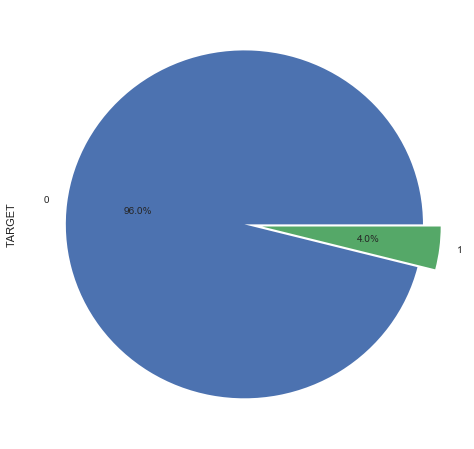

In [5]:
X = original.copy()
X = X.drop(['TARGET'], axis=1)
y = original['TARGET']
y.value_counts().plot.pie(explode=[0, 0.1], figsize=(8, 8), autopct='%1.1f%%');

In [6]:
X

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
3,2,34,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
4,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
8,2,37,0.0,195.00,195.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
10,2,39,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
13,2,23,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151825,2,39,0.0,375.99,405.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90214.170000
151829,2,48,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.988301324213
test score:  0.953222836096


In [8]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_pred)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

0.953406998158


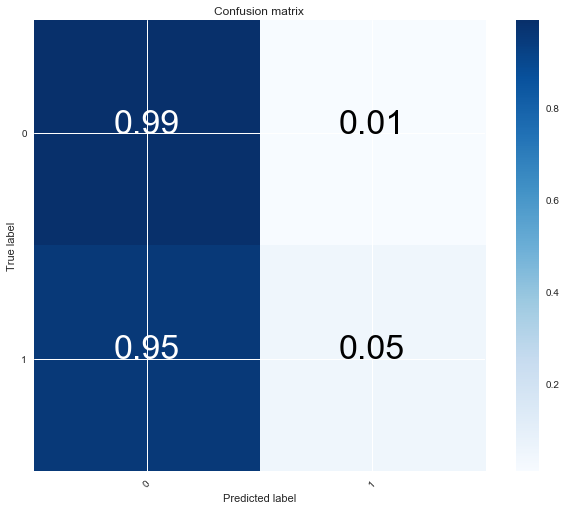

In [9]:
prediction = cross_val_predict(RandomForestClassifier(random_state=0), X, y, cv=3, n_jobs=3)
print(accuracy_score(train.TARGET, prediction))
plot_confusion_matrix(train.TARGET, prediction, classes=[0, 1], normalize=True)

0.960431465404


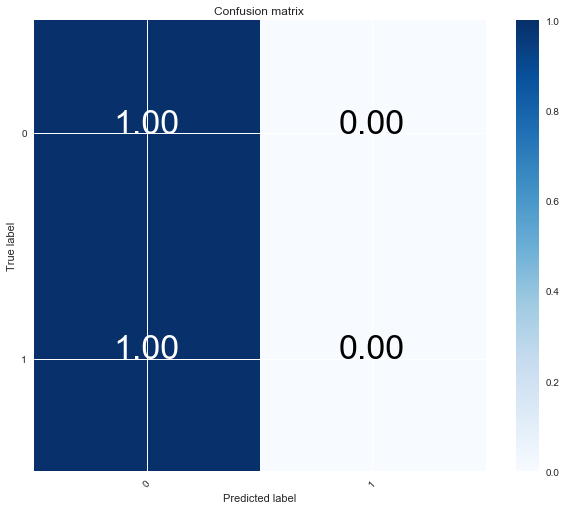

In [10]:
prediction = cross_val_predict(LogisticRegression(random_state=0), X, y, cv=3, n_jobs=3)
print(accuracy_score(train.TARGET, prediction))
plot_confusion_matrix(train.TARGET, prediction, classes=[0, 1], normalize=True)

0.95440673507


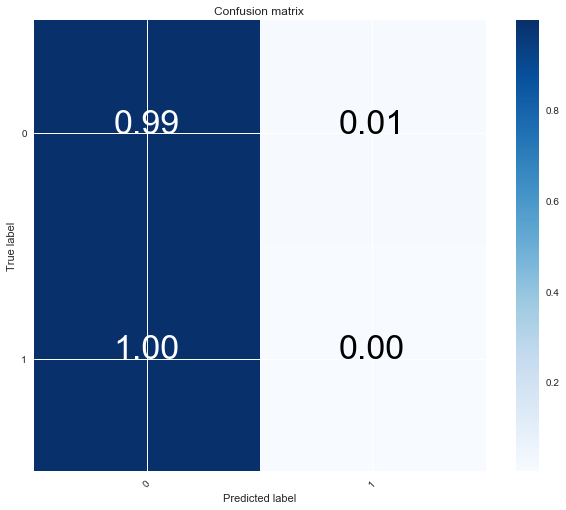

In [11]:
prediction = cross_val_predict(LinearSVC(random_state=0), X, y, cv=3, n_jobs=3)
print(accuracy_score(train.TARGET, prediction))
plot_confusion_matrix(train.TARGET, prediction, classes=[0, 1], normalize=True)

0.939358063667


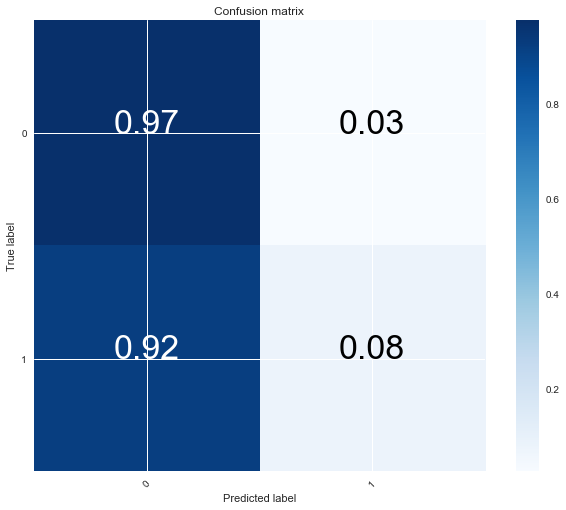

In [12]:
prediction = cross_val_predict(SVC(random_state=0, max_iter=100), X, y, cv=3, n_jobs=3)
print(accuracy_score(train.TARGET, prediction))
plot_confusion_matrix(train.TARGET, prediction, classes=[0, 1], normalize=True)

In [13]:
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
predictions = model.predict_proba(X_test)

In [14]:
y_pred = predictions[:,1]
roc_auc_score(y_test, y_pred)

0.68613877666276957

In [15]:
y_pred = LogisticRegression(random_state=0).fit(X_train, y_train).predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.59013448386799727

In [16]:
y_pred = LinearSVC(random_state=0).fit(X_train, y_train).predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [17]:
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC(random_state=0, max_iter=100, probability=True)),
])
y_pred = pipeline.fit(X_train, y_train).predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:220: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.41566964800889622

In [18]:
for est in [5, 10, 20, 50]:
    for dep in [5, 10, 20, 50]:
        y_pred = RandomForestClassifier(random_state=0, n_estimators=est, max_depth=dep).fit(X_train, y_train).predict_proba(X_test)[:,1]
        print(est, dep, roc_auc_score(y_test, y_pred))

5 5 0.753629977468
5 10 0.771912056718
5 20 0.758800724684
5 50 0.648968079861
10 5 0.772499070395
10 10 0.784102015874
10 20 0.782389240008
10 50 0.692469272029
20 5 0.779623882871
20 10 0.798454254387
20 20 0.802302681809
20 50 0.73290513451
50 5 0.779878540805
50 10 0.799497364758
50 20 0.805409392044
50 50 0.751806464924


In [19]:
for est in [75, 100, 150]:
    y_pred = RandomForestClassifier(random_state=0, n_estimators=est, max_depth=20).fit(X_train, y_train).predict_proba(X_test)[:,1]
    print(est, roc_auc_score(y_test, y_pred))

75 0.811357481603
100 0.811810664175
150 0.814268399191


In [20]:
for est in [200, 300]:
    y_pred = RandomForestClassifier(random_state=0, n_estimators=est, max_depth=20).fit(X_train, y_train).predict_proba(X_test)[:,1]
    print(est, roc_auc_score(y_test, y_pred))

200 0.813793579254
300 0.8146786713


In [21]:
for est in [125, 175]:
    y_pred = RandomForestClassifier(random_state=0, n_estimators=est, max_depth=20).fit(X_train, y_train).predict_proba(X_test)[:,1]
    print(est, roc_auc_score(y_test, y_pred))

125 0.812698051093
175 0.814127756323


In [22]:
y_pred = RandomForestClassifier(random_state=0, n_estimators=400, max_depth=20).fit(X_train, y_train).predict_proba(X_test)[:,1]
print(400, roc_auc_score(y_test, y_pred))

400 0.814415926674


In [23]:
for dep in [15, 20, 25, 30]:
    y_pred = RandomForestClassifier(random_state=0, n_estimators=150, max_depth=dep).fit(X_train, y_train).predict_proba(X_test)[:,1]
    print(dep, roc_auc_score(y_test, y_pred))

15 0.809580558602
20 0.814268399191
25 0.808613397564
30 0.805133315305


In [24]:
y_pred = RandomForestClassifier(random_state=1, n_estimators=150, max_depth=20).fit(X_train, y_train).predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred))

0.806886488202


In [25]:
y_pred = RandomForestClassifier(random_state=1, n_estimators=300, max_depth=20).fit(X_train, y_train).predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred))

0.810717540165


In [26]:
sample_submission

,TARGET
ID,
2,0
5,0
6,0
7,0
9,0
11,0
...,...
151828,0
151831,0


In [27]:
test_predictions = RandomForestClassifier(random_state=1, n_estimators=300, max_depth=20).fit(X, y).predict_proba(test)[:,1]

In [28]:
submit_file = pd.DataFrame(test_predictions, columns=['TARGET'], index=test.index)
submit_file.to_csv("D:\\FMI2\\ML\\santander\\submit.csv")

In [29]:
submit_file

,TARGET
ID,
2,0.040360
5,0.033856
6,0.003301
7,0.026731
9,0.004914
11,0.173195
...,...
151828,0.001148
151831,0.154957
